In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
stud = pd.read_csv('stud_math.csv')

In [218]:
display(stud.head(10))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [219]:
#переименуем составной столбец
stud.rename(columns = {'studytime, granular':'studytime_gr'}, inplace = True)

In [220]:
#прогоним путсые стринги и  посмотрим какие есть уникальные данные, требуют ли каки-то форматирования
for column in stud.columns:
    if stud.loc[:,column].dtype == 'O':
        stud.loc[:,column].apply(lambda x : None if pd.isnull(x)
           else None if str.lower(x) == 'nan'
           else None if x.strip == ''
           else x.strip())
    display(pd.DataFrame(stud.loc[:,column].value_counts()))

,school
GP,349
MS,46


,sex
F,208
M,187


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


,address
U,295
R,83


,famsize
GT3,261
LE3,107


,Pstatus
T,314
A,36


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


,reason
course,137
home,104
reputation,103
other,34


,guardian
mother,250
father,86
other,28


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


,failures
0.0,293
1.0,49
2.0,16
3.0,15


,schoolsup
no,335
yes,51


,famsup
yes,219
no,137


,paid
no,200
yes,155


,activities
yes,195
no,186


,nursery
yes,300
no,79


,studytime_gr
-6.0,194
-3.0,103
-9.0,64
-12.0,27


,higher
yes,356
no,19


,internet
yes,305
no,56


,romantic
no,240
yes,124


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


возьмем в новый датафрейм правильно заполненные данные

In [221]:
study = stud[(stud['Fedu'] != 40) & (stud['famrel'] != -1)]
study.info() 
study.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        393 non-null    object 
 1   sex           393 non-null    object 
 2   age           393 non-null    int64  
 3   address       376 non-null    object 
 4   famsize       366 non-null    object 
 5   Pstatus       350 non-null    object 
 6   Medu          390 non-null    float64
 7   Fedu          369 non-null    float64
 8   Mjob          374 non-null    object 
 9   Fjob          357 non-null    object 
 10  reason        376 non-null    object 
 11  guardian      362 non-null    object 
 12  traveltime    365 non-null    float64
 13  studytime     386 non-null    float64
 14  failures      371 non-null    float64
 15  schoolsup     384 non-null    object 
 16  famsup        354 non-null    object 
 17  paid          353 non-null    object 
 18  activities    379 non-null    

,count,mean,std,min,25%,50%,75%,max
age,393.0,16.702290,1.275923,15.0,16.0,17.0,18.0,22.0
Medu,390.0,2.753846,1.099625,0.0,2.0,3.0,4.0,4.0
Fedu,369.0,2.514905,1.088687,0.0,2.0,2.0,3.0,4.0
traveltime,365.0,1.435616,0.690869,1.0,1.0,1.0,2.0,4.0
studytime,386.0,2.038860,0.841176,1.0,1.0,2.0,2.0,4.0
failures,371.0,0.334232,0.739896,0.0,0.0,0.0,0.0,3.0
studytime_gr,386.0,-6.116580,2.523528,-12.0,-6.0,-6.0,-3.0,-3.0
famrel,366.0,3.948087,0.891380,1.0,4.0,4.0,5.0,5.0
freetime,382.0,3.238220,0.992521,1.0,3.0,3.0,4.0,5.0
goout,385.0,3.111688,1.115933,1.0,2.0,3.0,4.0,5.0


In [222]:
def check_nums(column):
    median = study.loc[:,column].median()
    IQR = study.loc[:,column].quantile(0.75) - study.loc[:,column].quantile(0.25)
    print(median, IQR, 'нижняя граница =',median - 1.5*IQR, 'верхняя граница =',median + 1.5*IQR)
    study.loc[:,column].loc[study.loc[:,column].between(median - 1.5*IQR, median + 1.5*IQR)].hist(label = 'IQR')
    plt.legend();

рассмотрим все столбцы по очерди, какие данные есть и что из себя могут предсталять 
school - всего 2 уникальных значения, все не пустые, т.е. в выборке учавствуют ученики только двух школ.
можно количество учеников в школе GP на порябок больше, чем в MS. можно предположить, что данный столбец не будет влиять на модель оценки выборки. 
очистим стобцы absences и score от выбросов

4.0 8.0 нижняя граница = -8.0 верхняя граница = 16.0


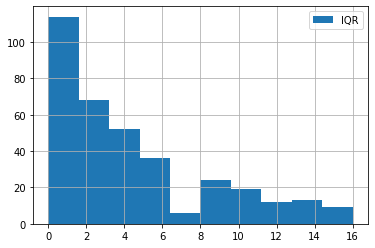

In [223]:
check_nums('absences')

In [224]:
study = study.loc[(study.absences >= 0) & (study.absences <= 16)]

count    348.000000
mean      52.097701
std       23.246498
min        0.000000
25%       43.750000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

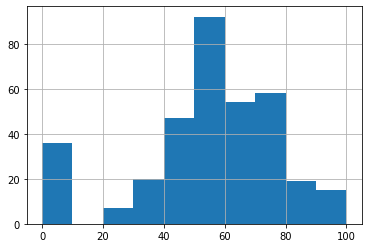

In [225]:
study.score.hist()
study.score.describe()

55.0 26.25 нижняя граница = 15.625 верхняя граница = 94.375


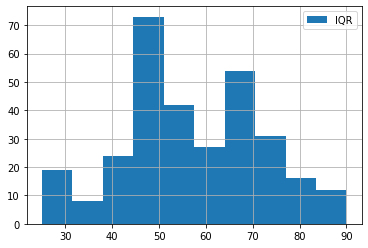

In [226]:
check_nums('score')

In [227]:
study = study.loc[(study.score >= 15.625) & (study.score <= 94.375)]

count    306.000000
mean      16.588235
std        1.241519
min       15.000000
25%       16.000000
50%       16.000000
75%       17.000000
max       22.000000
Name: age, dtype: float64

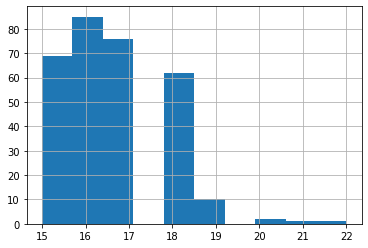

In [228]:
study.age.hist()
study.age.describe()


16.0 1.0 нижняя граница = 14.5 верхняя граница = 17.5


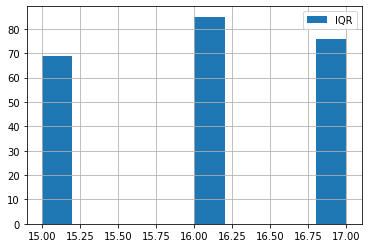

In [229]:
check_nums('age')

Сдравый смысл говорит, что надо исключить учеников старше 20 лет 

In [230]:
study = study.loc[(study.age < 20)]

count    282.000000
mean       3.950355
std        0.899397
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

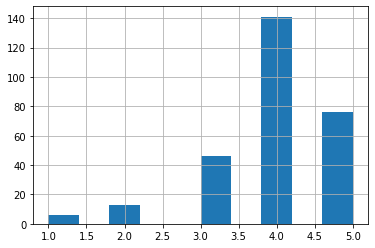

In [231]:
study.famrel.hist()
study.famrel.describe()

4.0 1.0 нижняя граница = 2.5 верхняя граница = 5.5


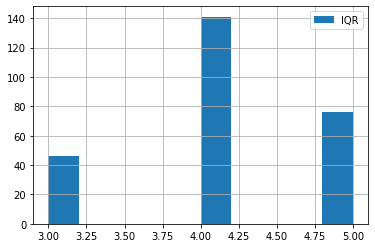

In [232]:
check_nums('famrel')

In [233]:
study = study.loc[(study.famrel >= 3)]

count    250.000000
mean       3.580000
std        1.354599
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

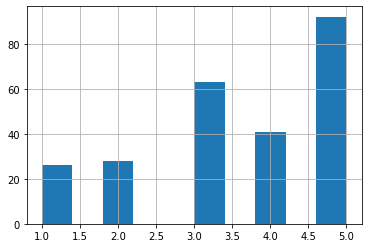

In [234]:
study.health.hist()
study.health.describe()

4.0 2.0 нижняя граница = 1.0 верхняя граница = 7.0


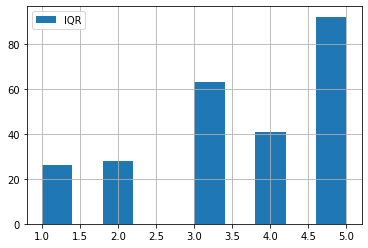

In [235]:
check_nums('health')

нечего удалять

count    259.000000
mean       3.235521
std        0.973751
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

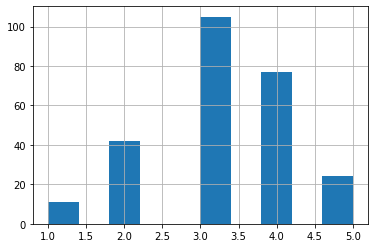

In [238]:
study.freetime.hist()
study.freetime.describe()

3.0 1.0 нижняя граница = 1.5 верхняя граница = 4.5


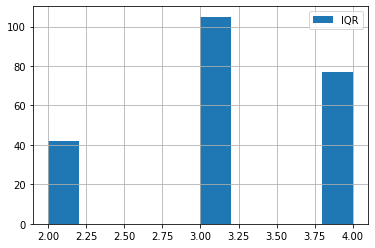

In [239]:
check_nums('freetime')

In [240]:
study = study.loc[(study.freetime >= 1.5) & (study.freetime <= 4.5)]

count    211.000000
mean       0.180095
std        0.548402
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

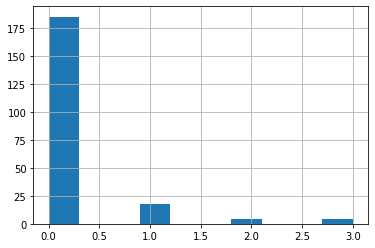

In [243]:
study.failures.hist()
study.failures.describe()

0.0 0.0 нижняя граница = 0.0 верхняя граница = 0.0


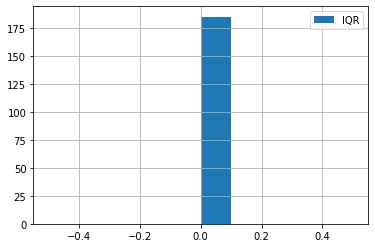

In [244]:
check_nums('failures')

In [246]:
study = study.loc[(study.failures == 0)]

count    183.000000
mean       2.103825
std        0.822177
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: studytime, dtype: float64

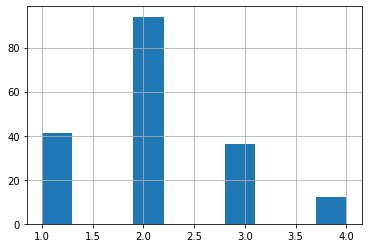

In [247]:
study.studytime.hist()
study.studytime.describe()

2.0 1.0 нижняя граница = 0.5 верхняя граница = 3.5


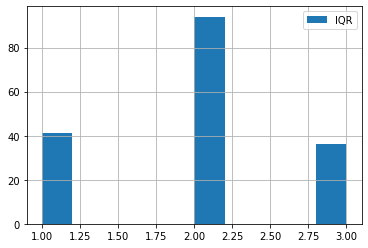

In [248]:
check_nums('studytime')

In [249]:
study = study.loc[(study.studytime <= 3.5)]

count    158.000000
mean       1.449367
std        0.691601
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

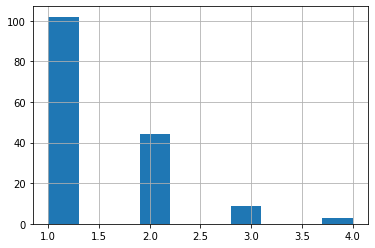

In [250]:
study.traveltime.hist()
study.traveltime.describe()

1.0 1.0 нижняя граница = -0.5 верхняя граница = 2.5


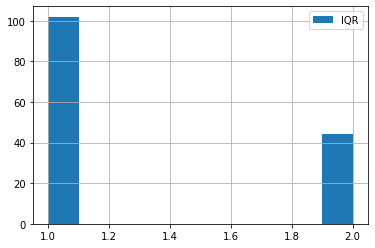

In [251]:
check_nums('traveltime')

In [252]:
study = study.loc[(study.traveltime <= 2.5)]

3.0 2.0 нижняя граница = 0.0 верхняя граница = 6.0


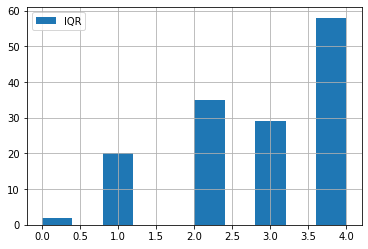

In [258]:
check_nums('Medu')

3.0 2.0 нижняя граница = 0.0 верхняя граница = 6.0


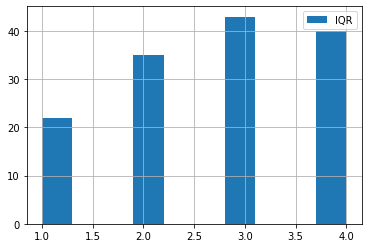

In [259]:
check_nums('Fedu')

Образование родителей не имеет выбросов, но здравй смысл подсказывает исключить Medu = 0 

In [261]:
study = study.loc[(study.Medu > 0)]

In [262]:
study2 = study
#равним соотношения уникальных значений на сколько поменялось
for column in study2.columns:
    display(pd.DataFrame(study2.loc[:,column].value_counts()))

,school
GP,128
MS,14


,sex
F,79
M,63


,age
16,45
17,39
15,29
18,27
19,2


,address
U,119
R,20


,famsize
GT3,97
LE3,39


,Pstatus
T,119
A,12


,Medu
4.0,58
2.0,35
3.0,29
1.0,20


,Fedu
3.0,42
4.0,40
2.0,33
1.0,21


,Mjob
other,50
services,30
teacher,24
at_home,19
health,12


,Fjob
other,72
services,40
teacher,11
health,7
at_home,6


,reason
course,49
home,37
reputation,37
other,10


,guardian
mother,93
father,31
other,2


,traveltime
1.0,99
2.0,43


,studytime
2.0,80
1.0,31
3.0,31


,failures
0.0,142


,schoolsup
no,119
yes,19


,famsup
yes,77
no,50


,paid
yes,65
no,60


,activities
yes,74
no,62


,nursery
yes,110
no,28


,studytime_gr
-6.0,80
-3.0,31
-9.0,31


,higher
yes,133
no,2


,internet
yes,114
no,16


,romantic
no,92
yes,39


,famrel
4.0,73
5.0,42
3.0,27


,freetime
3.0,70
4.0,44
2.0,28


,goout
3.0,57
2.0,33
4.0,32
5.0,12
1.0,5


,health
5.0,42
3.0,31
4.0,29
2.0,20
1.0,15


,absences
0.0,36
4.0,30
2.0,28
6.0,10
8.0,8
10.0,7
3.0,4
12.0,4
7.0,3
16.0,3


,score
55.0,24
50.0,22
70.0,18
65.0,13
45.0,13
75.0,12
60.0,11
40.0,10
80.0,7
30.0,7


In [263]:
study2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 394
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        142 non-null    object 
 1   sex           142 non-null    object 
 2   age           142 non-null    int64  
 3   address       139 non-null    object 
 4   famsize       136 non-null    object 
 5   Pstatus       131 non-null    object 
 6   Medu          142 non-null    float64
 7   Fedu          136 non-null    float64
 8   Mjob          135 non-null    object 
 9   Fjob          136 non-null    object 
 10  reason        133 non-null    object 
 11  guardian      126 non-null    object 
 12  traveltime    142 non-null    float64
 13  studytime     142 non-null    float64
 14  failures      142 non-null    float64
 15  schoolsup     138 non-null    object 
 16  famsup        127 non-null    object 
 17  paid          125 non-null    object 
 18  activities    136 non-null    